<a href="https://colab.research.google.com/github/tararauzumaki/uits-machine-learning-lab/blob/main/Image_Classification_Using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/flowers-recognition


In [2]:
# Step 1: Import libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [3]:
# Step 2: Load and preprocess the dataset

# Load dataset
(ds_train, ds_val), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Define constants
IMG_SIZE = 224
BATCH_SIZE = 32

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

# Apply preprocessing
AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.map(preprocess, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)

ds_val = ds_val.map(preprocess, num_parallel_calls=AUTOTUNE)
ds_val = ds_val.batch(BATCH_SIZE).prefetch(AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.V4NCSY_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


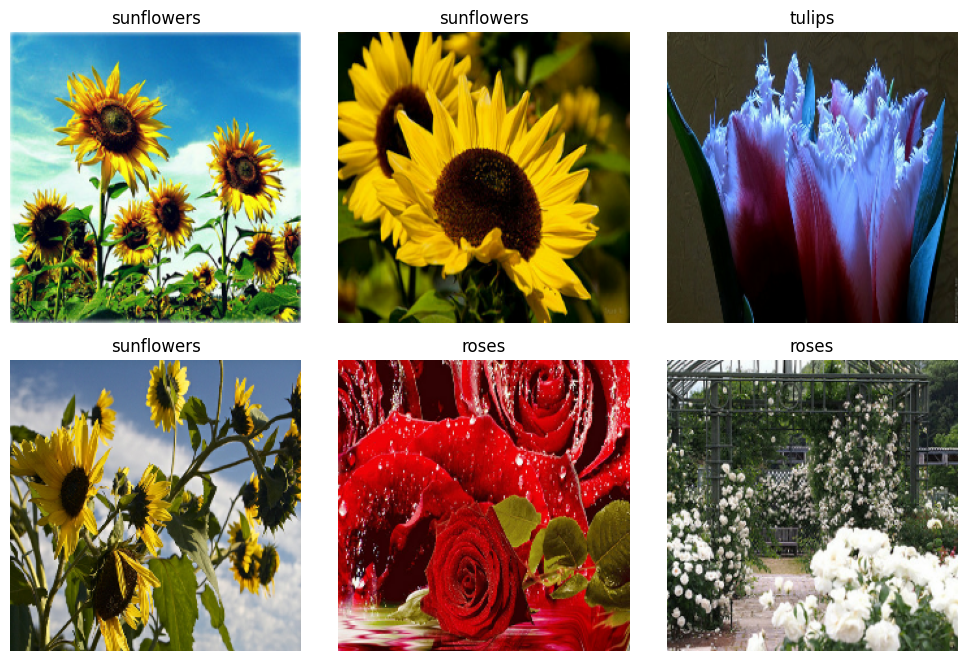

In [5]:
# Step 3: Visualize sample data

class_names = ds_info.features['label'].names

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):  # Take one batch
    for i in range(6):  # Display first 6 images from the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
plt.tight_layout()
plt.show()

In [6]:
# Step 4: Create the model using MobileNetV2

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Step 5: Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Step 6: Train the model
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=5
)


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.6699 - loss: 0.8739 - val_accuracy: 0.8815 - val_loss: 0.3386
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.8821 - loss: 0.3281 - val_accuracy: 0.8774 - val_loss: 0.3299
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.9136 - loss: 0.2501 - val_accuracy: 0.8924 - val_loss: 0.2938
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.9393 - loss: 0.1820 - val_accuracy: 0.8992 - val_loss: 0.3187
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9457 - loss: 0.1585 - val_accuracy: 0.9101 - val_loss: 0.2897


In [9]:
# Step 7: Evaluate the model
loss, accuracy = model.evaluate(ds_val)
print(f"Validation Accuracy: {accuracy:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9215 - loss: 0.2816
Validation Accuracy: 0.9101


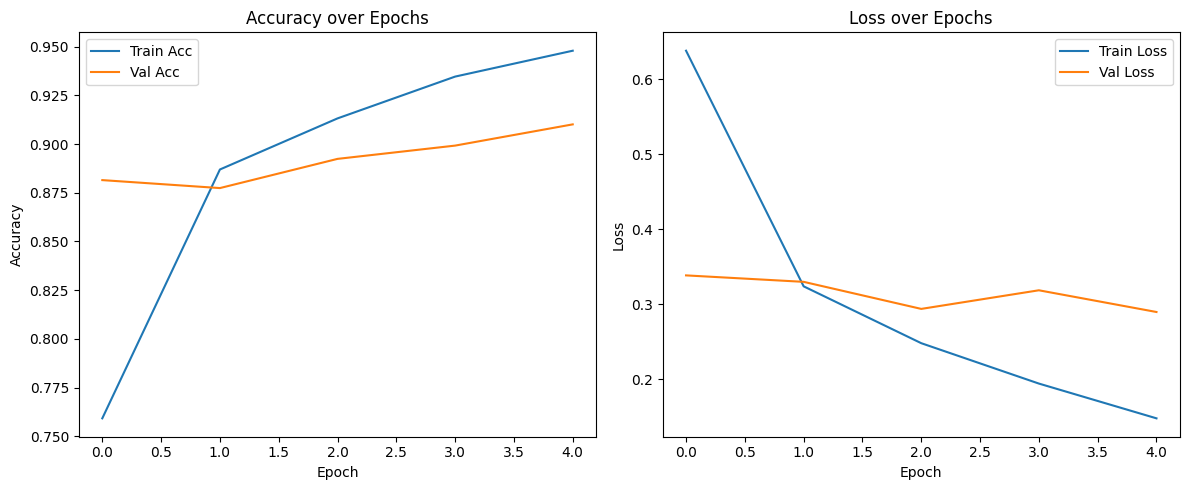

In [10]:
# Step 8: Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()